In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.datasets import fashion_mnist

# The data has been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [6]:
# Now let's check out an example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [7]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
# Check shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Okay, 60,000 training examples each with shape (28,28) and a label each as well as 10,000 test examples of shape(28,28).

But these are just numbers, let's visualize.

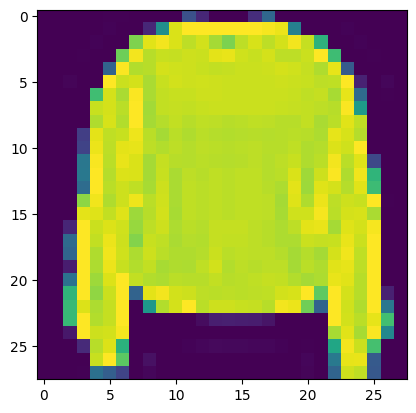

In [9]:
# Plot a single example
plt.imshow(train_data[7])

In [10]:
# Check our samples label
train_labels[5]

2

It looks like our labels are in numeric form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a samll list of class names.

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes aare there (thi'll be our output shape)?
len(class_names)

10

Now, we have these, let's plot another example.

Text(0.5, 1.0, 'Pullover')

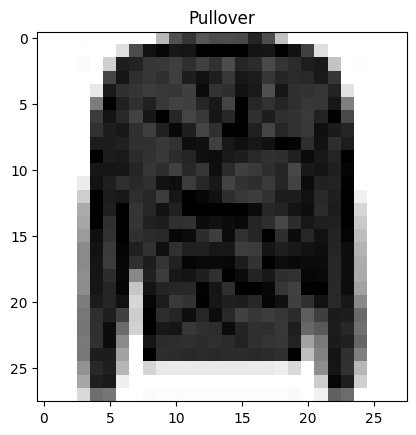

In [12]:
# Plot an example image and its label
plt.imshow(train_data[27], cmap=plt.cm.binary) # Change the colors to black and white
plt.title(class_names[train_labels[27]])

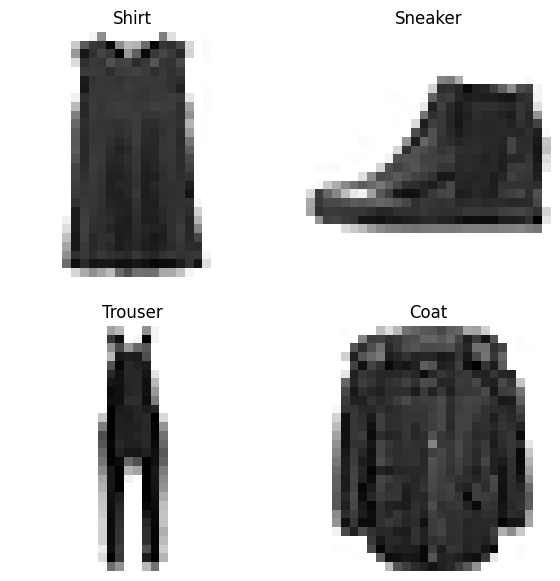

In [13]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [14]:
# Let's build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # Output shape is 10, activation is softmax
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, # Different loss function for multiclass classification
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels)) # See how the data performs on the test set

Epoch 1/10
1875/1875 [==============================] - 2s 846us/step - loss: 2.4342 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 1s 716us/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 1s 718us/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 1s 757us/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 1s 771us/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 1s 762us/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 1s 755us/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 -

In [15]:
# Check the shape of our model
# Note: The "None" in (None, 784) is for batch_size, will be covered later
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

We can get these values between 0 and 1 bydividing the entire array by the maximum: 255.0 (dividing by float also converts to a float).

We will use the same model as before except this time it will be normalized.

In [17]:
# Divide train and test images by maximum value (normalize it)
train_data = train_data/ 255.0
test_data = test_data/ 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [18]:
# Let's build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Seuqential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input layer (we had to reshape 28x28 to 784)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 804us/step - loss: 1.1521 - accuracy: 0.5996 - val_loss: 0.8421 - val_accuracy: 0.6982
Epoch 2/10
1875/1875 [==============================] - 1s 763us/step - loss: 0.7429 - accuracy: 0.7447 - val_loss: 0.7078 - val_accuracy: 0.7670
Epoch 3/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.6533 - accuracy: 0.7799 - val_loss: 0.6653 - val_accuracy: 0.7777
Epoch 4/10
1875/1875 [==============================] - 1s 757us/step - loss: 0.6198 - accuracy: 0.7883 - val_loss: 0.6459 - val_accuracy: 0.7828
Epoch 5/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.6016 - accuracy: 0.7950 - val_loss: 0.6316 - val_accuracy: 0.7830
Epoch 6/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.5877 - accuracy: 0.7992 - val_loss: 0.6379 - val_accuracy: 0.7839
Epoch 7/10
1875/1875 [==============================] - 1s 752us/step - loss: 0.5794 - accuracy: 0.8027 - val_loss: 0.6218 -

<Axes: title={'center': 'Non-Normalized Data'}>

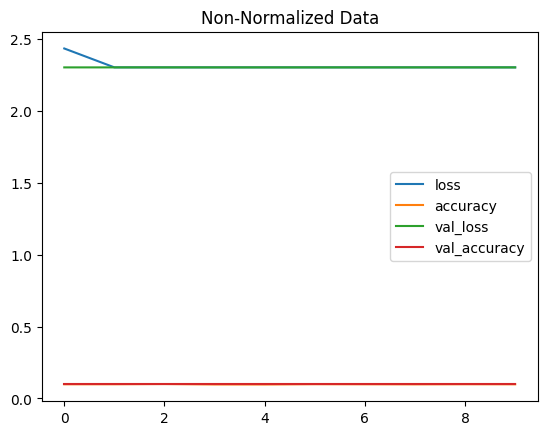

In [19]:
# Let's plot non-normalized data's loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")

<Axes: title={'center': 'Normalized Data'}>

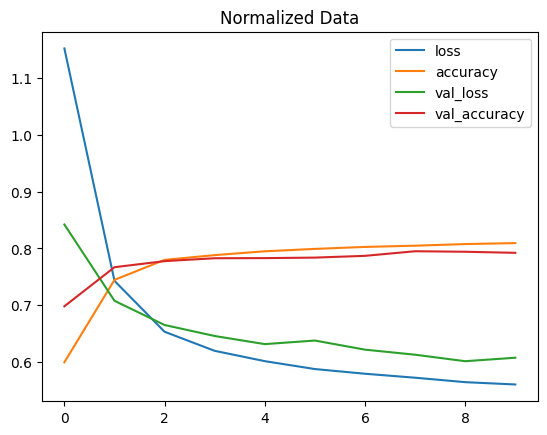

In [20]:
# Let's plot the normalized data's loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

How about we find ideal learning rate and see what happens?

We'll use the same architecture we have been using.

In [21]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create the learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 3. Fit the model
find_lr_history = model_2.fit(train_data, 
                              train_labels, # Model is already doing pretty good with current LR, probably don't need to change LR.
                              epochs=40,
                              validation_data=(test_data, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 771us/step - loss: 1.4289 - accuracy: 0.4872 - val_loss: 1.1181 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 747us/step - loss: 0.8198 - accuracy: 0.7216 - val_loss: 0.7229 - val_accuracy: 0.7586 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 755us/step - loss: 0.6645 - accuracy: 0.7679 - val_loss: 0.6673 - val_accuracy: 0.7684 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 758us/step - loss: 0.6281 - accuracy: 0.7782 - val_loss: 0.6531 - val_accuracy: 0.7697 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 751us/step - loss: 0.6077 - accuracy: 0.7830 - val_loss: 0.6443 - val_accuracy: 0.7750 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 747us/step - loss: 0.5941 - accuracy: 0.7864 - val_loss: 0.6282 - val_accuracy: 0.7730 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Finding the ideal learning rate')

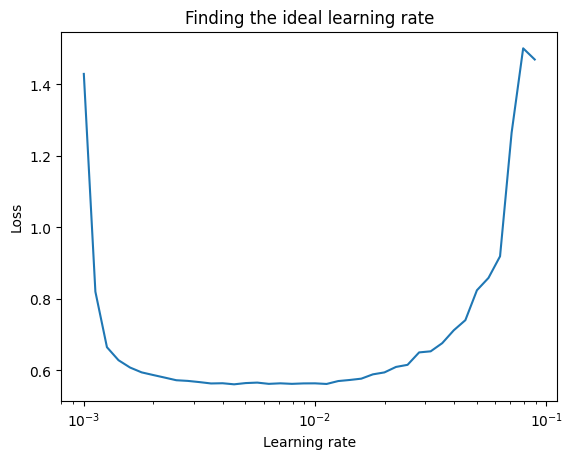

In [22]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # Want the x-axis to be log scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")